<a href="https://colab.research.google.com/github/Sofismarilla/PatientVisitsForecasting/blob/main/%5BGroup_Test_A%5D_Data_Analysis_and_Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Forecasting For Management Allocation of Healthcare Decision based on Medical Laboratory's Hospital** (*thesis*)

### Description of Dataset

This study was conducted to predict the number of patients who will come in the next few days along with the income that the medical laboratory will get to manage resource needs in the future. The core topic that will be raised for this research is about time series forecasting.

**Emperical Study : <br>
(1) Data Collection**<br>
    We collect the data from a medical laborotory the one of the Big Hospital in Indramayu. The daily aggregrate data were collected from July,1 2017 until March,8 2021 (3years) <br>
    
**(2) Data Preprocessing** <br>
Data cleaning was proceed into the dataset. And reach out of the date, total patient visit (/day), and total of income (/day).

# **Exploratory Data Analysis, Pre-processing and Evaluation Metrics**

### Step#0 : Fire System (Necessary Library Preparation)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
import tensorflow as tf
%matplotlib inline

from math import sqrt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from timeit import default_timer as timer

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['axes.grid'] = False

### Step#1 : Read Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/THESIS/Dataset/dateset_patient.csv')

### Step #2. Data Preprocessing (Shapping & Transformation)

In [4]:
df.head(5)

,date,hm,hm_aw,hm_am,cc,cc_aw,cc_am,day_week
0,7/1/2017,66,48,63,44,37,45,6
1,7/2/2017,53,53,62,72,37,43,7
2,7/3/2017,74,54,59,87,42,44,1
3,7/4/2017,87,56,57,58,49,44,2
4,7/5/2017,95,62,58,72,53,44,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1348 non-null   object
 1   hm        1348 non-null   int64 
 2   hm_aw     1348 non-null   int64 
 3   hm_am     1348 non-null   int64 
 4   cc        1348 non-null   int64 
 5   cc_aw     1348 non-null   int64 
 6   cc_am     1348 non-null   int64 
 7   day_week  1348 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 84.4+ KB


In [6]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['weekday']= df.apply(lambda row: row['date'].weekday(),axis=1)
df['weekday'] = (df["weekday"] < 5).astype(int)

df = df.loc[:,['date', 'year', 'month', 'day', 'day_week', 'weekday', 'hm', 'hm_aw', 'hm_am']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1348 non-null   datetime64[ns]
 1   year      1348 non-null   int64         
 2   month     1348 non-null   int64         
 3   day       1348 non-null   int64         
 4   day_week  1348 non-null   int64         
 5   weekday   1348 non-null   int64         
 6   hm        1348 non-null   int64         
 7   hm_aw     1348 non-null   int64         
 8   hm_am     1348 non-null   int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 94.9 KB


In [8]:
df.head(10)

,date,year,month,day,day_week,weekday,hm,hm_aw,hm_am
0,2017-07-01,2017,7,1,6,0,66,48,63
1,2017-07-02,2017,7,2,7,0,53,53,62
2,2017-07-03,2017,7,3,1,1,74,54,59
3,2017-07-04,2017,7,4,2,1,87,56,57
4,2017-07-05,2017,7,5,3,1,95,62,58
5,2017-07-06,2017,7,6,4,1,94,68,58
6,2017-07-07,2017,7,7,5,1,85,73,59
7,2017-07-08,2017,7,8,6,0,81,79,59
8,2017-07-09,2017,7,9,7,0,57,81,60
9,2017-07-10,2017,7,10,1,1,77,82,60


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb5a0db2650>,
      dtype=object)

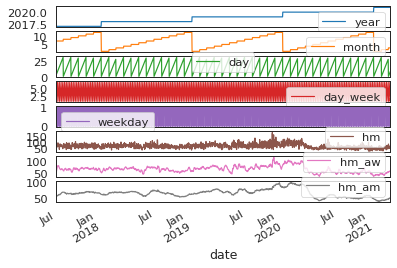

In [9]:
df.set_index('date')[['year', 'month', 'day', 'day_week', 'weekday', 'hm', 'hm_aw', 'hm_am']].plot(subplots=True)

In [10]:
df

,date,year,month,day,day_week,weekday,hm,hm_aw,hm_am
0,2017-07-01,2017,7,1,6,0,66,48,63
1,2017-07-02,2017,7,2,7,0,53,53,62
2,2017-07-03,2017,7,3,1,1,74,54,59
3,2017-07-04,2017,7,4,2,1,87,56,57
4,2017-07-05,2017,7,5,3,1,95,62,58
...,...,...,...,...,...,...,...,...,...
1343,2021-03-05,2021,3,5,5,1,45,58,52
1344,2021-03-06,2021,3,6,6,0,51,59,52
1345,2021-03-07,2021,3,7,7,0,44,59,52
1346,2021-03-08,2021,3,8,1,1,49,59,51


In [11]:
print('The time series starts from: ', df.date.min())
print('The time series ends on: ', df.date.max())
print('The Total data:', len(df))

The time series starts from:  2017-07-01 00:00:00
The time series ends on:  2021-03-09 00:00:00
The Total data: 1348


### Step #3. Plotting data by Order

In [12]:
df.set_index('date',inplace=True)

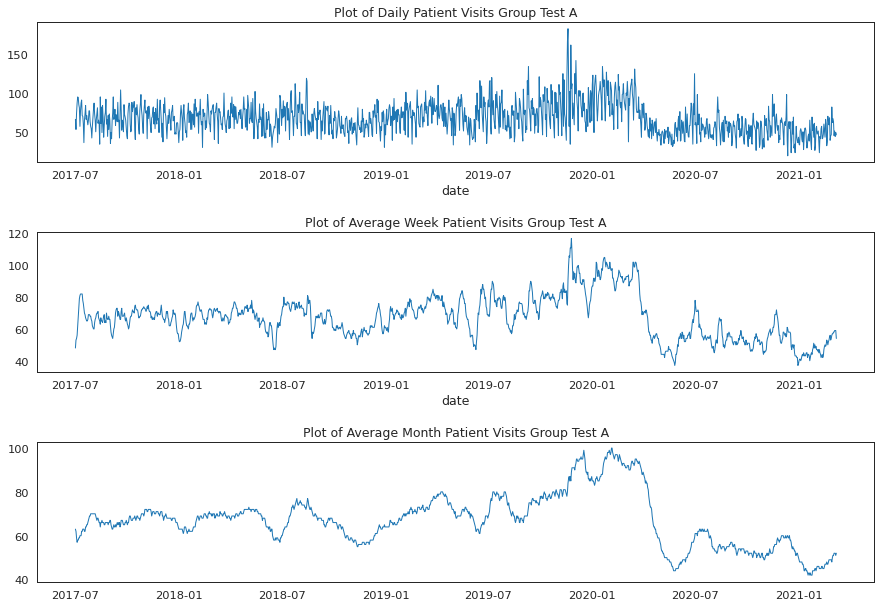

In [13]:
fig = plt.figure(figsize=(15,18))
fig.subplots_adjust(hspace=.5)
plt.tight_layout()

p1 = fig.add_subplot(5,1,1)
p1.plot(df['hm'],linewidth=1)
p1.set_title('Plot of Daily Patient Visits Group Test A')
p1.set_ylabel('')
p1.set_xlabel('date')
p1.tick_params(axis='both', which='major')

p2 = fig.add_subplot(5,1,2, sharex=p1)
p2.plot(df['hm_aw'],linewidth=1)
p2.set_title('Plot of Average Week Patient Visits Group Test A')
p2.set_ylabel('')
p2.set_xlabel('date')
p2.tick_params(axis='both', which='major')

p3 = fig.add_subplot(5,1,3, sharex=p2)
p3.plot(df['hm_am'],linewidth=1)
p3.set_title('Plot of Average Month Patient Visits Group Test A')
p2.set_ylabel('')
p2.set_xlabel('date')
p3.tick_params(axis='both', which='major')

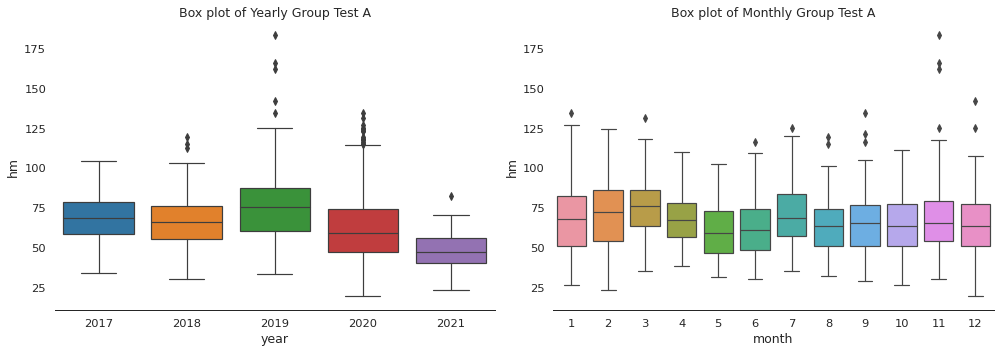

In [14]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="year", y="hm", data=df)
plt.xlabel('year')
plt.title('Box plot of Yearly Group Test A')
sns.despine(left=True)
plt.tight_layout()

plt.subplot(1,2,2)
sns.boxplot(x="month", y="hm", data=df)
plt.xlabel('month')
plt.title('Box plot of Monthly Group Test A')
sns.despine(left=True)
plt.tight_layout();

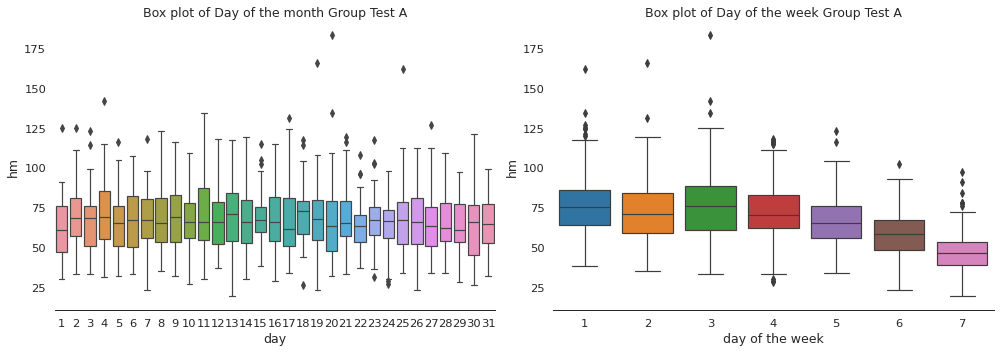

In [15]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="day", y="hm", data=df)
plt.xlabel('day')
plt.title('Box plot of Day of the month Group Test A')
sns.despine(left=True)
plt.tight_layout()

plt.subplot(1,2,2)
sns.boxplot(x="day_week", y="hm", data=df)
plt.xlabel('day of the week')
plt.title('Box plot of Day of the week Group Test A')
sns.despine(left=True)
plt.tight_layout();

,count,mean,std,min,25%,50%,75%,max
year,1348.0000,2018.8286,1.1232,2017.0000,2018.0000,2019.0000,2020.0000,2021.0000
month,1348.0000,6.6832,3.5314,1.0000,3.0000,7.0000,10.0000,12.0000
day,1348.0000,15.6558,8.8192,1.0000,8.0000,16.0000,23.0000,31.0000
day_week,1348.0000,4.0000,2.0026,1.0000,2.0000,4.0000,6.0000,7.0000
weekday,1348.0000,0.7136,0.4522,0.0000,0.0000,1.0000,1.0000,1.0000
hm,1348.0000,67.2315,20.3556,19.0000,53.0000,66.0000,79.0000,183.0000
hm_aw,1348.0000,67.2352,13.4192,37.0000,57.0000,67.5000,74.0000,117.0000
hm_am,1348.0000,67.2604,12.0619,42.0000,59.0000,68.0000,73.0000,100.0000


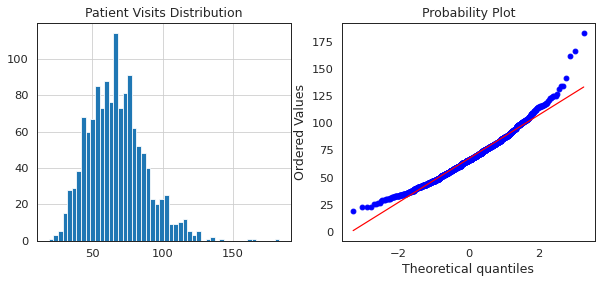

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df['hm'].hist(bins=50)
plt.title('Patient Visits Distribution')
plt.subplot(1,2,2)
stats.probplot(df['hm'], plot=plt);
df.describe().T

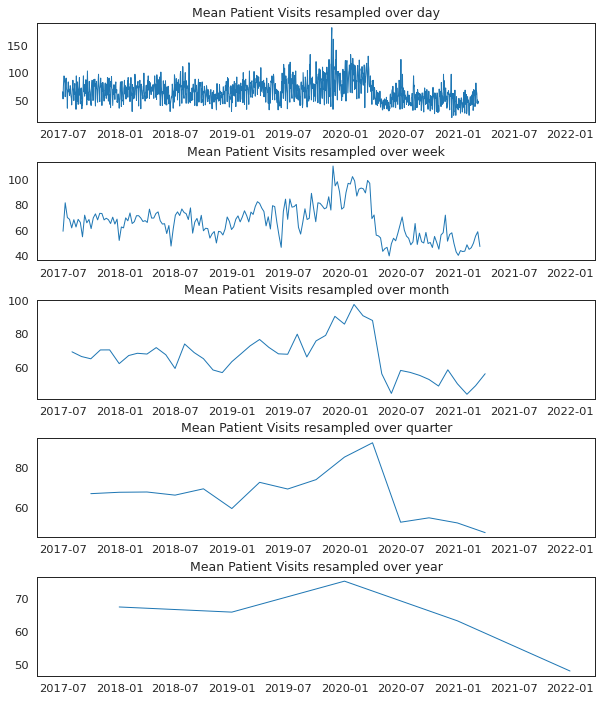

In [17]:
fig = plt.figure(figsize=(10,12))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(df['hm'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Patient Visits resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(df['hm'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Patient Visits resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(df['hm'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Patient Visits resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(df['hm'].resample('Q').mean(),linewidth=1)
ax4.set_title('Mean Patient Visits resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(df['hm'].resample('A').mean(),linewidth=1)
ax5.set_title('Mean Patient Visits resampled over year')
ax5.tick_params(axis='both', which='major');

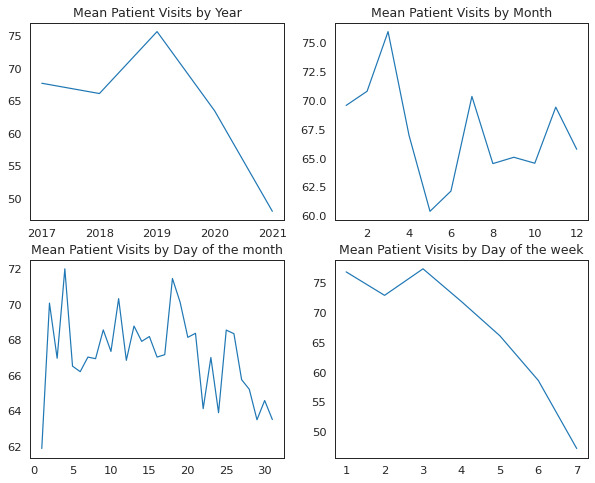

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
df.groupby('year').hm.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Patient Visits by Year')

plt.subplot(2,2,2)
df.groupby('month').hm.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Patient Visits by Month')

plt.subplot(2,2,3)
df.groupby('day').hm.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Patient Visits by Day of the month')

plt.subplot(2,2,4)
df.groupby('day_week').hm.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Patient Visits by Day of the week');

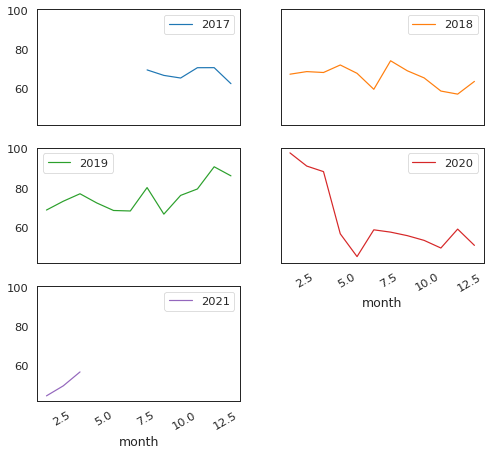

In [19]:
pd.pivot_table(df.loc[df['year'] != 2016], values = "hm", 
               columns = "year", index = "month").plot(subplots = True, figsize=(8, 8), layout=(3, 2), sharey=True);

In [20]:
#dic={0:'Weekend',1:'Weekday'}
#df['weekday'] = df.weekday.map(dic)
#a=plt.figure(figsize=(9,4)) 
#plt1=sns.boxplot('month','hm',hue='weekday',width=0.6,fliersize=3,
#                    data=df)                                                                                                                                                                                                                                                                                                                                                 
#a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
#sns.despine(left=True, bottom=True) 
#plt.xlabel('month')
#plt.tight_layout()                                                                                                                  
#plt.legend().set_visible(False);

In [21]:
df

,year,month,day,day_week,weekday,hm,hm_aw,hm_am
date,,,,,,,,
2017-07-01,2017,7,1,6,0,66,48,63
2017-07-02,2017,7,2,7,0,53,53,62
2017-07-03,2017,7,3,1,1,74,54,59
2017-07-04,2017,7,4,2,1,87,56,57
2017-07-05,2017,7,5,3,1,95,62,58
...,...,...,...,...,...,...,...,...
2021-03-05,2021,3,5,5,1,45,58,52
2021-03-06,2021,3,6,6,0,51,59,52
2021-03-07,2021,3,7,7,0,44,59,52


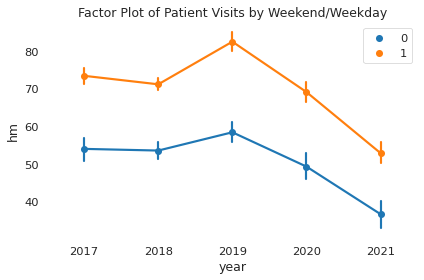

In [22]:
plt1=sns.factorplot('year','hm',hue='weekday',
                    data=df, size=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
plt.title('Factor Plot of Patient Visits by Weekend/Weekday')                                                             
plt.tight_layout()                                                                                                                  
sns.despine(left=True, bottom=True) 
plt.legend(loc='upper right');

### Step #4. Checking Stationaries of Data


***`Dickey-Fuller test`***

*   Null Hypothesis (H0): It suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
*   Alternate Hypothesis (H1): It suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
* p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
*   p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [23]:
hm_dataset = pd.DataFrame(data=df.values, columns=['year', 'month', 'day', 'day_week', 'weekday', 'hm', 'hm_aw', 'hm_am'],
                          index=pd.date_range(start='2017-07-01', periods=1348, freq='D'))
hm_dataset = hm_dataset.drop(columns = ['year', 'month', 'day', 'day_week'])

Text(0, 0.5, 'Patient Visits Volume')

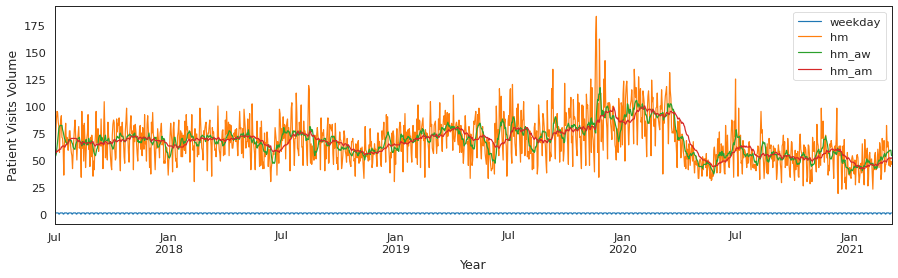

In [24]:
hm_dataset.plot(figsize=(15,4))
plt.xlabel('Year')
plt.ylabel('Patient Visits Volume')

In [25]:
#creating test for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):

  #Perform Dicky Fuller Test:
  print ('Result of Dicky-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], 
                       index=['Test Statistic','p-value','#Lags Used',
                              'Number of Observations Used'])
  
  for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

In [26]:
#Loop to check all columns of the DF
import functools
hm_dataset.apply(functools.partial(test_stationary))

Result of Dicky-Fuller Test:
Test Statistic                   0.0000
p-value                          0.9585
#Lags Used                      10.0000
Number of Observations Used   1337.0000
Critical Value (1%)             -3.4353
Critical Value (5%)             -2.8637
Critical Value (10%)            -2.5679
dtype: float64
Result of Dicky-Fuller Test:
Test Statistic                  -2.5335
p-value                          0.1075
#Lags Used                      20.0000
Number of Observations Used   1327.0000
Critical Value (1%)             -3.4353
Critical Value (5%)             -2.8637
Critical Value (10%)            -2.5679
dtype: float64
Result of Dicky-Fuller Test:
Test Statistic                  -2.7086
p-value                          0.0726
#Lags Used                      23.0000
Number of Observations Used   1324.0000
Critical Value (1%)             -3.4353
Critical Value (5%)             -2.8637
Critical Value (10%)            -2.5679
dtype: float64
Result of Dicky-Fuller Test:

weekday    None
hm         None
hm_aw      None
hm_am      None
dtype: object

### Step #5. Differencing

In [27]:
hm_dataset_Diff = hm_dataset.diff().dropna()
hm_dataset_Diff = hm_dataset_Diff.astype(int)
hm_dataset_Diff.head()

,weekday,hm,hm_aw,hm_am
2017-07-02,0,-13,5,-1
2017-07-03,1,21,1,-3
2017-07-04,0,13,2,-2
2017-07-05,0,8,6,1
2017-07-06,0,-1,6,0


Text(0, 0.5, 'Patient Visits Volume')

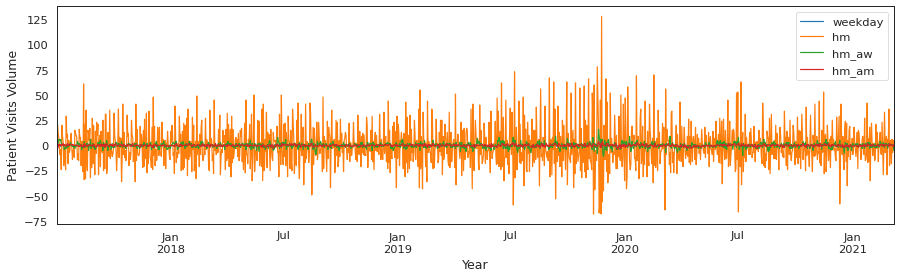

In [28]:
hm_dataset_Diff.plot(figsize=(15,4))
plt.xlabel('Year')
plt.ylabel('Patient Visits Volume')

In [29]:
hm_dataset_Diff.apply(functools.partial(test_stationary))

Result of Dicky-Fuller Test:
Test Statistic                -11638954639616102.0000
p-value                                        0.0000
#Lags Used                                     8.0000
Number of Observations Used                 1338.0000
Critical Value (1%)                           -3.4352
Critical Value (5%)                           -2.8637
Critical Value (10%)                          -2.5679
dtype: float64
Result of Dicky-Fuller Test:
Test Statistic                 -13.4265
p-value                          0.0000
#Lags Used                      19.0000
Number of Observations Used   1327.0000
Critical Value (1%)             -3.4353
Critical Value (5%)             -2.8637
Critical Value (10%)            -2.5679
dtype: float64
Result of Dicky-Fuller Test:
Test Statistic                  -8.8973
p-value                          0.0000
#Lags Used                      22.0000
Number of Observations Used   1324.0000
Critical Value (1%)             -3.4353
Critical Value (5%)      

weekday    None
hm         None
hm_aw      None
hm_am      None
dtype: object

In [30]:
hm_dataset_Diff.dtypes

weekday    int64
hm         int64
hm_aw      int64
hm_am      int64
dtype: object

### Step #6. Correlation Data Check

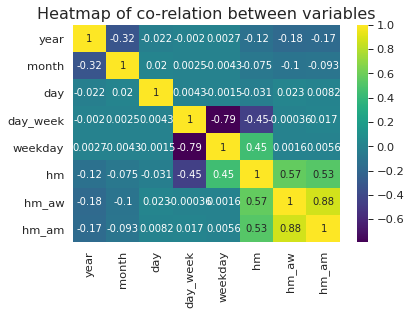

In [31]:
#Use heatmap to see corelation between variables
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [32]:
print(df.corr())

            year   month     day  day_week  weekday      hm   hm_aw   hm_am
year      1.0000 -0.3220 -0.0216   -0.0020   0.0027 -0.1216 -0.1766 -0.1717
month    -0.3220  1.0000  0.0201    0.0025  -0.0043 -0.0747 -0.1004 -0.0927
day      -0.0216  0.0201  1.0000    0.0043  -0.0015 -0.0313  0.0231  0.0082
day_week -0.0020  0.0025  0.0043    1.0000  -0.7911 -0.4533 -0.0004  0.0174
weekday   0.0027 -0.0043 -0.0015   -0.7911   1.0000  0.4478  0.0016  0.0056
hm       -0.1216 -0.0747 -0.0313   -0.4533   0.4478  1.0000  0.5673  0.5310
hm_aw    -0.1766 -0.1004  0.0231   -0.0004   0.0016  0.5673  1.0000  0.8752
hm_am    -0.1717 -0.0927  0.0082    0.0174   0.0056  0.5310  0.8752  1.0000


### Step #7. Trend and Seasonal Test

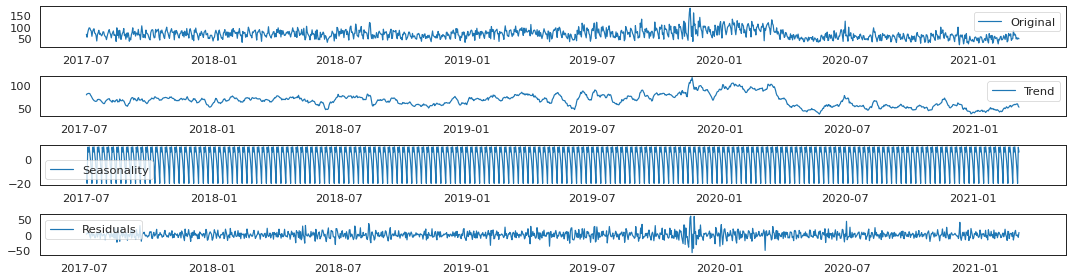

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

x = hm_dataset.hm

x = x.astype(float) # force float
decomposition = seasonal_decompose(x)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15,4))

plt.subplot(411)
plt.plot(x, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Step #8. Autocorrelation

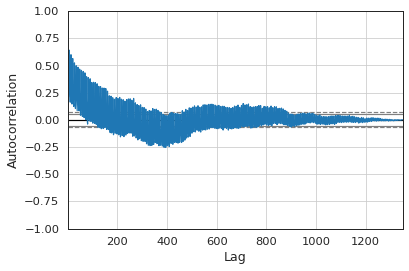

In [34]:
# from pandas.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot

x = hm_dataset['hm'].astype(float)
autocorrelation_plot(x)

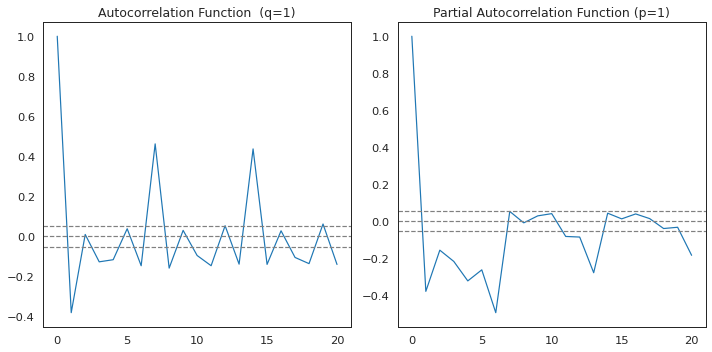

In [35]:
from statsmodels.tsa.stattools import acf, pacf

x = hm_dataset['hm'].astype(float)

x_diff = x.diff().dropna() # first item is NA
# ACF and PACF plots:

plt.figure(figsize=(10,5))
lag_acf = acf(x_diff, nlags=20, fft=True)
lag_pacf = pacf(x_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function  (q=1)')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(x_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function (p=1)')
plt.tight_layout()

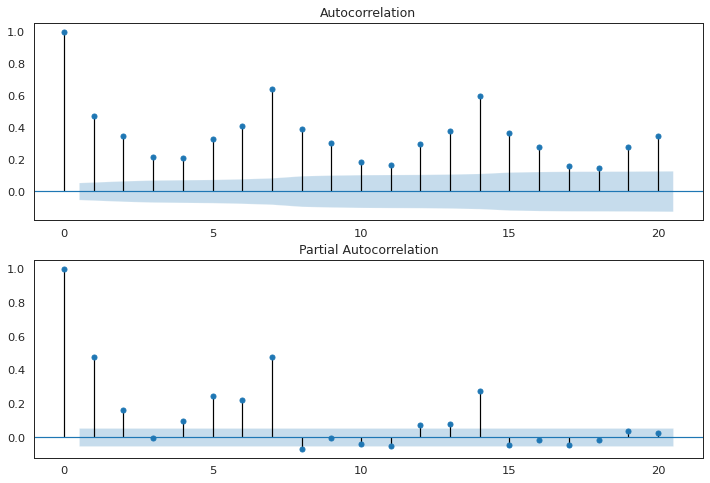

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#2 plots on one sheet

%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(x, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(x, lags=20, ax=ax2)

#blue color means the boundaries of the 95% confidence interval
#if bar ranges outside the boundaries, we can assume that the lag has autocorrelation

# **Model Experiment**

**Step #1. Look at the Data**

*   How many rows are in the dataset?
*   How many coloumns are in this dataset?
*   What data types are the columns?
*   Is the data complete? Are there nulls? Do we have to infer values?
*   What is the definition of these columns?
*   What are some other caveats to the data?


# **Univariate**

## **Univariate ARMA Model**

[Reference](https://duchesnay.github.io/pystatsml/statistics/time_series.html)

In [37]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

                              ARMA Model Results                              
Dep. Variable:                     hm   No. Observations:                 1347
Model:                    ARMA(2, 12)   Log Likelihood               -5576.850
Method:                       css-mle   S.D. of innovations             15.186
Date:                Wed, 16 Jun 2021   AIC                          11185.700
Time:                        12:14:42   BIC                          11268.991
Sample:                    07-02-2017   HQIC                         11216.896
                         - 03-09-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0163      0.048     -0.342      0.732      -0.110       0.077
ar.L1.hm      -0.4094      0.172     -2.381      0.017      -0.746      -0.072
ar.L2.hm       0.2760      0.134      2.064      0.0

Text(0.5, 1.0, 'RSS: 311099.4428')

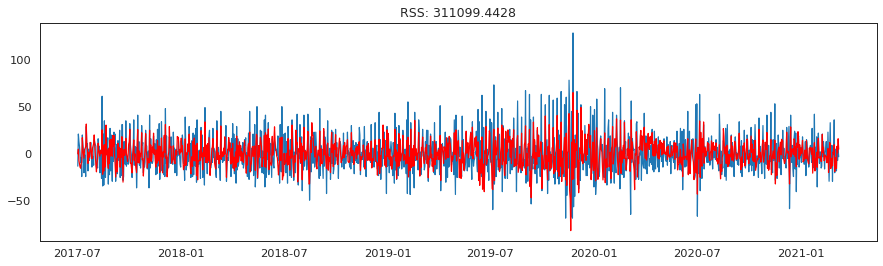

In [38]:
from statsmodels.tsa.arima_model import ARMA
x = hm_dataset_Diff['hm']
model = ARMA(x, order=(2, 12)).fit() # fit model

print(model.summary())
plt.figure(figsize=(15,4))
plt.plot(x)
plt.plot(model.predict(), color='red')
plt.title('RSS: %.4f'% sum((model.fittedvalues-x)**2))

## **Univariate Prophet Model**

[Reference](https://udemy.com/course)

### **Step #0**. Installing Package and Library





In [39]:
pip install fbprophet

In [40]:
from fbprophet import Prophet

### **Step #1.** Data Processing

In [41]:
hm_prophet_df = hm_dataset_Diff.drop(columns= ['weekday', 'hm_aw', 'hm_am'])

In [42]:
hm_prophet_df = pd.DataFrame({'ds': hm_prophet_df.index,
                              'y' : hm_prophet_df.hm})

In [43]:
hm_prophet_df = hm_prophet_df.reset_index()

In [44]:
hm_prophet_df = hm_prophet_df.drop(columns= ['index'])

In [45]:
hm_prophet_df

,ds,y
0,2017-07-02,-13
1,2017-07-03,21
2,2017-07-04,13
3,2017-07-05,8
4,2017-07-06,-1
...,...,...
1342,2021-03-05,-18
1343,2021-03-06,6
1344,2021-03-07,-7
1345,2021-03-08,5


### **Step #2.** Train Model

In [46]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(hm_prophet_df)

### **Step #3.** Forecast

In [47]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-07-02,-10.3899,-46.3131,21.8124,-10.3899,-10.3899,-0.8586,-0.8586,-0.8586,10.4298,10.4298,10.4298,-11.4308,-11.4308,-11.4308,0.1424,0.1424,0.1424,0.0000,0.0000,0.0000,-11.2485
1,2017-07-03,-10.3900,-1.2472,60.9339,-10.3900,-10.3900,40.2172,40.2172,40.2172,10.4298,10.4298,10.4298,29.7399,29.7399,29.7399,0.0475,0.0475,0.0475,0.0000,0.0000,0.0000,29.8272
2,2017-07-04,-10.3901,-35.6358,26.6457,-10.3901,-10.3901,6.4648,6.4648,6.4648,10.4298,10.4298,10.4298,-3.9219,-3.9219,-3.9219,-0.0431,-0.0431,-0.0431,0.0000,0.0000,0.0000,-3.9253
3,2017-07-05,-10.3902,-27.1718,37.1022,-10.3902,-10.3902,14.6497,14.6497,14.6497,10.4298,10.4298,10.4298,4.3479,4.3479,4.3479,-0.1281,-0.1281,-0.1281,0.0000,0.0000,0.0000,4.2594
4,2017-07-06,-10.3903,-36.4331,24.8515,-10.3903,-10.3903,4.7437,4.7437,4.7437,10.4298,10.4298,10.4298,-5.4797,-5.4797,-5.4797,-0.2064,-0.2064,-0.2064,0.0000,0.0000,0.0000,-5.6466


In [48]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1442,2021-06-13,-10.5306,-42.4288,22.9549,-10.5306,-10.5306,-0.0389,-0.0389,-0.0389,10.4298,10.4298,10.4298,-11.4308,-11.4308,-11.4308,0.9621,0.9621,0.9621,0.0000,0.0000,0.0000,-10.5695
1443,2021-06-14,-10.5307,-0.3085,61.4757,-10.5307,-10.5307,41.1876,41.1876,41.1876,10.4298,10.4298,10.4298,29.7399,29.7399,29.7399,1.0179,1.0179,1.0179,0.0000,0.0000,0.0000,30.6569
1444,2021-06-15,-10.5308,-36.5677,29.4272,-10.5308,-10.5308,7.5697,7.5697,7.5697,10.4298,10.4298,10.4298,-3.9219,-3.9219,-3.9219,1.0618,1.0618,1.0618,0.0000,0.0000,0.0000,-2.9611
1445,2021-06-16,-10.5309,-26.9833,37.9108,-10.5309,-10.5309,15.8710,15.8710,15.8710,10.4298,10.4298,10.4298,4.3479,4.3479,4.3479,1.0933,1.0933,1.0933,0.0000,0.0000,0.0000,5.3401
1446,2021-06-17,-10.5310,-35.5457,24.4362,-10.5310,-10.5310,6.0618,6.0618,6.0618,10.4298,10.4298,10.4298,-5.4797,-5.4797,-5.4797,1.1117,1.1117,1.1117,0.0000,0.0000,0.0000,-4.4692


In [49]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2017-07-02,-11.2485
1,2017-07-03,29.8272
2,2017-07-04,-3.9253
3,2017-07-05,4.2594
4,2017-07-06,-5.6466
...,...,...
1442,2021-06-13,-10.5695
1443,2021-06-14,30.6569
1444,2021-06-15,-2.9611
1445,2021-06-16,5.3401


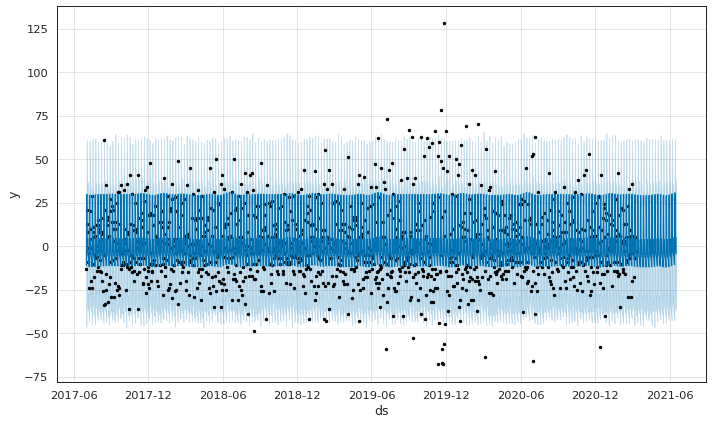

In [50]:
plot1 = model.plot(forecast)

**Plots Information** 

*   Black dots representing the actual data
*   Blue line representing the predict data or yhat
*   Shade blue means boundaries of confindence 95%






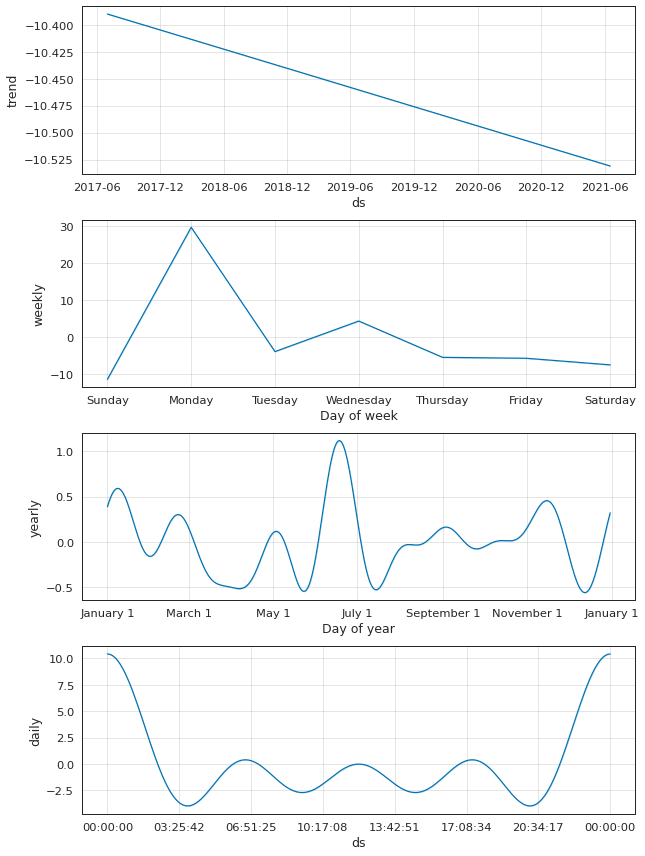

In [51]:
plot2 = m.plot_components(forecast)

# **Multivariate**

### **Univariate Arima**

In [52]:
!pip install pmdarima
!pip install shap
!pip install --upgrade mxnet~=1.7 gluonts
!pip install python-utils
!pip install plotly==4.1.0
!pip install -U scikit-learn

     |████████████████████████████████| 1.5MB 7.9MB/s 
     |████████████████████████████████| 9.5MB 23.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


     |████████████████████████████████| 358kB 7.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491622 sha256=7bc47ac25965f9acea2f2ccf8a00068fbde8f9c1c2121438e2609a0b6294eed9
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
     |████████████████████████████████| 46.9MB 93kB/s 
     |████████████████████████████████| 901kB 36.6MB/s 
     |████████████████████████████████| 10.1MB 33.7MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 7.1MB 6.0MB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 4.1.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


     |████████████████████████████████| 22.3MB 2.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [53]:
import pandas as pd
import numpy as np

# Data visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns 
import folium

# Statistics 
import scipy
import statsmodels as sms
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

ImportError: ignored

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/THESIS/Dataset/dateset_patient.csv')
data.tail(10)

In [ ]:
data["date"] = pd.to_datetime(data["date"], format = '%m/%d/%Y')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(0)

In [ ]:
plt.figure(figsize = (8,3))
plt.subplot(121); plot_acf(data['hm'], lags = 40, ax = plt.gca(), color = 'green')
plt.subplot(122); plot_pacf(data['hm'], lags = 40, ax = plt.gca(), color = 'green')
plt.show()

In [ ]:
result = adfuller(data['hm'].dropna())
print("ADF Statistics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

In [ ]:
data['diff1'] = data['hm'].diff()
data['diff1'] = data['diff1'].fillna(data['diff1'].mean())
ax = sns.lineplot(x = data['date'], y = data['diff1'], color='blue')
sns.lineplot(x = data['date'], y = data['diff1'].mean(), color='salmon')
plt.xlabel('Date')
plt.ylabel('Nonseasonal diff. series of 1nd order')
plt.show()
result = adfuller(data.diff1)
print("ADF Statistics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

In [ ]:
plt.figure(figsize = (8,3))
plt.subplot(121); plot_acf(data['diff1'], lags = 40, ax = plt.gca(), color = 'green')
plt.subplot(122); plot_pacf(data['diff1'], lags = 40,ax = plt.gca(), color = 'green')
plt.show()

In [ ]:
data.tail()

In [ ]:
train = data['hm'][:100]
test = data['hm'][100:]
model = ARIMA(data['hm'], order = (0,1,1))
model = model.fit()
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end, typ = 'levels')
print(pred.tail(10))
plt.figure(figsize=(12,5), dpi=100)
ax = sns.lineplot(x=data['date'], y = pred, label='forecast')
sns.lineplot(x=data['date'], y = data['hm'], label='actual', ax=ax)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# RMSE
from math import sqrt
import math
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objs as go

print('MSE value :', mean_squared_error(test, pred))
print('RMSE value  : ', sqrt(mean_squared_error(test, pred)))

## **Multivariate ARIMA Model**

### **Step #0.** Installing Package and Library

In [143]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime

### **Step #1.** Data Preprocessing








In [147]:
hm = df['hm'].fillna(df['hm'].mean())
hm_aw = df['hm_aw'].fillna(df['hm'].mean())
hm_am = df['hm_am'].fillna(df['hm'].mean())
#weekday = df['weekday'].fillna(df['hm'].mean())

In [148]:
df_RH = pd.DataFrame({'hm':hm, 'hm_aw':hm_aw, 'hm_am':hm_am})
df.to_csv("hm.csv")
df_RH.head()

,hm,hm_aw,hm_am
0,66,48,63
1,53,53,62
2,74,54,59
3,87,56,57
4,95,62,58


In [149]:
df_RH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hm      1348 non-null   int64
 1   hm_aw   1348 non-null   int64
 2   hm_am   1348 non-null   int64
dtypes: int64(3)
memory usage: 31.7 KB


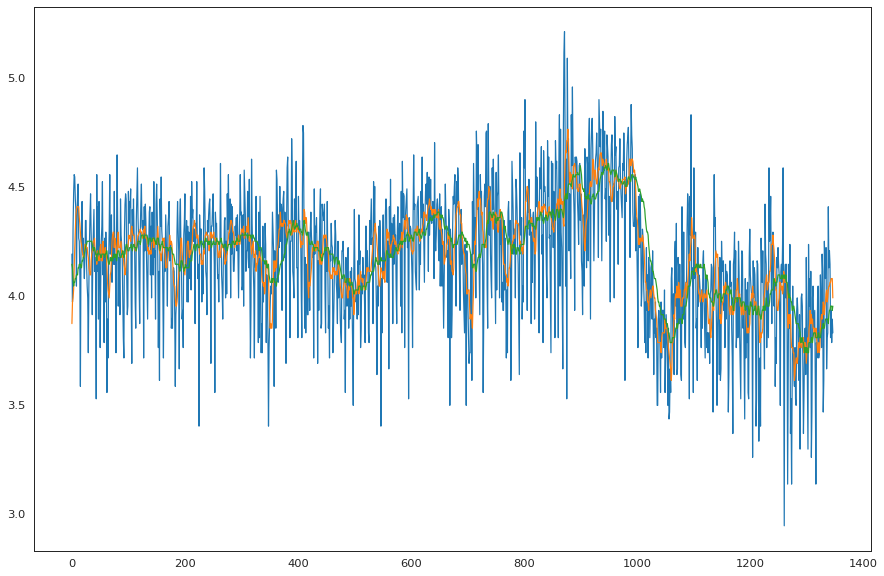

In [150]:
rcParams['figure.figsize'] = 15,10
#Estimate trend
df_RH_logScale = np.log(df_RH)
plt.plot(df_RH_logScale)

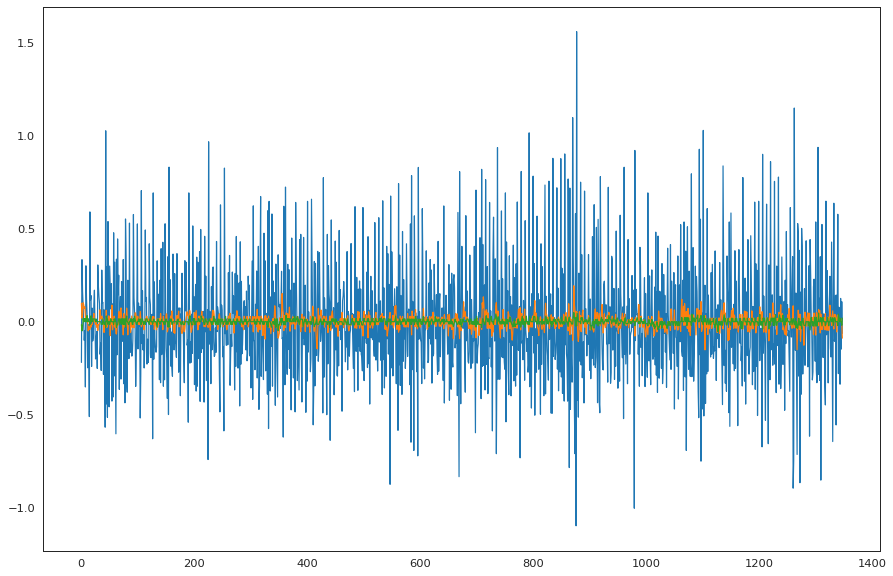

In [151]:
datasetLogDiffShifting  = df_RH_logScale-df_RH_logScale.shift()
datasetLogDiffShifting.dropna(inplace=True)
plt.plot(datasetLogDiffShifting)

### **Step #2.** Train Model

Plotting AR Model


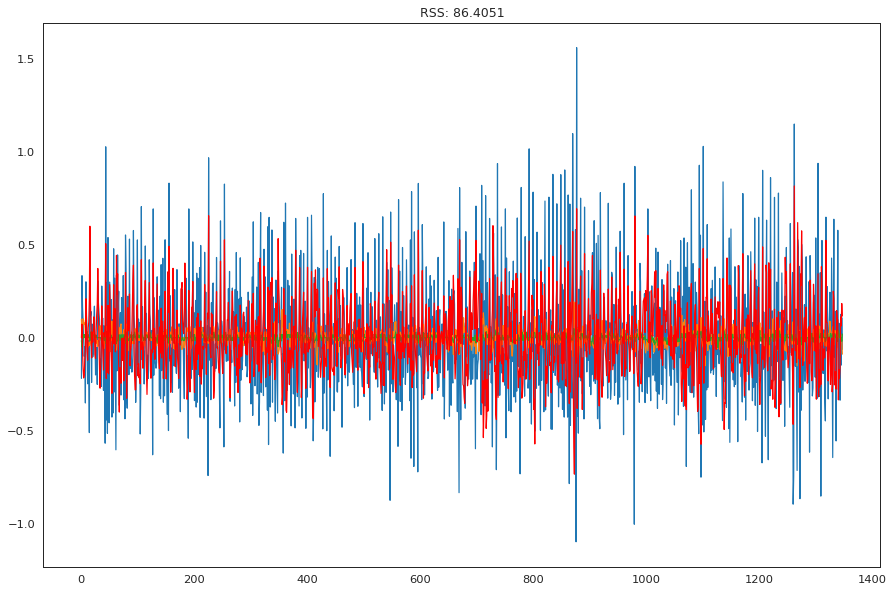

In [152]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model

model = ARIMA(df_RH_logScale['hm'],order=(2, 1, 2))

# print(model)
result_ARIMA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_ARIMA.fittedvalues-datasetLogDiffShifting['hm'])**2))
print('Plotting AR Model')

### **Step #3.** Prediction

In [153]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues,copy=True)
print(prediction_ARIMA_diff.head())

1   -0.0003
2    0.0727
3   -0.0782
4   -0.1678
5   -0.2169
dtype: float64


In [154]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

1   -0.0003
2    0.0724
3   -0.0057
4   -0.1735
5   -0.3904
dtype: float64


In [155]:
prediction_ARIMA_log = pd.Series(df_RH_logScale['hm'].iloc[0], index=df_RH_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value =0)
prediction_ARIMA_log.head()

0   4.1897
1   4.1894
2   4.2621
3   4.1839
4   4.0161
dtype: float64

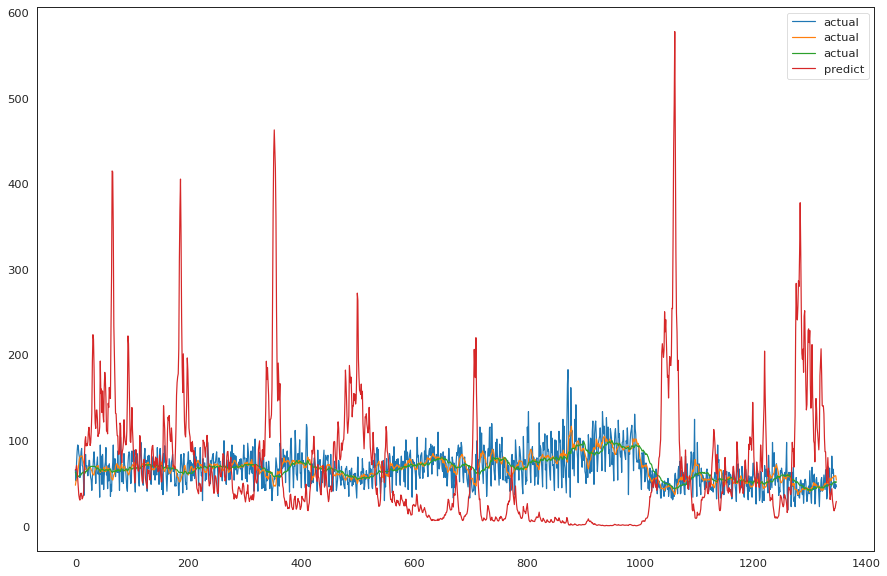

In [156]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(df_RH, label='actual')
plt.plot(prediction_ARIMA, label='predict')
plt.legend(loc='best')

In [ ]:
# RMSE
from math import sqrt
import math
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objs as go

#for i in cols:

print('MSE value :', mean_squared_error(hm, prediction_ARIMA))
print('RMSE value  : ', sqrt(mean_squared_error(hm, prediction_ARIMA)))
#print('R-Square value :', r2_score(hm, prediction_ARIMA))
#print('MAE value : ', mean_absolute_error(hm, prediction_ARIMA))

### **Step #4.** Forecast

In [ ]:
result_ARIMA.plot_predict(start='2018-01-10', end='2021-3-9')

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_RH.S1[:1000]
test = df_RH.S1[1000:]

In [ ]:
# Forecast
fc, se, conf = result_ARIMA.forecast(348, alpha=0.01)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    print('Evaluation Metrics ARIMA')
    print('MAPE = ', mape)
    print('ME = ', me)
    print('MAE = ', mae)
    print('MPE = ', mpe)
    print('RMSE = ', rmse)
    print('ACF1 = ', acf1)
    print('CORR = ', corr)
    print('Minmax = ', minmax)
forecast_accuracy(fc, test.values)

##**Multivariate VAR Model**

### **Step #1.** Data Preprocessing

In [ ]:
#DataDiff is Data Differencing we used in HM because data not stationary
DataDiff = hm_dataset_Diff.astype(int)
DataDiff.dtypes

In [ ]:
#Creating the VAR model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(DataDiff)

In [ ]:
#Bestmodel order
modsel = model.select_order(15)
modsel.summary()

In [ ]:
#Automated model order selection
results = model.fit(maxlags=15, ic='aic')
results.summary()

In [ ]:
#Ganger test for causality
#p-value should not be significant or higher than 0.05 it means implies that the variable(second square brackets) had a relation is mutual of variable(first square brackets)
#p-value should be < 0.05 (5%)

grangres = results.test_causality(['weekday','hm_aw','hm_am'], ['hm'], kind='f')
grangres.summary()

### **Step #2.** Train Test Split

In [ ]:
#creating the train and validation set
train = DataDiff[:int(0.8*(len(DataDiff)))]
test = DataDiff[int(0.8*(len(DataDiff))):]

In [ ]:
train.shape

In [ ]:
test.shape

### **Step #3.** Train Model

In [ ]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit(12)

### **Step #4.** Prediction (based on Train and Test)

In [ ]:
# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(test))

In [ ]:
prediction.shape

In [ ]:
pd.DataFrame(prediction).head()

In [ ]:
hm_values2 = pd.DataFrame(prediction)[1]
hm_values2.head(10)

In [ ]:
hm_dataset.head(1077)

In [ ]:
#Convert to original data, 63 from the last train data (hm) values
DeDiff_pred = np.cumsum(hm_values2) + 63
pred = pd.DataFrame(DeDiff_pred.astype(int))
pred.head(10)

In [ ]:
pred.shape

In [ ]:
#Take an original data
actual = np.cumsum(test.hm) + 63
actual = pd.DataFrame(actual)
actual.head(10)

In [ ]:
actual.shape

### **Step #5.** Forecast

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,15))
results.plot_forecast(30)
plt.tight_layout(h_pad = 1.15)
plt.show()

In [ ]:
fcast=results.forecast(DataDiff.values, 30)

In [ ]:
pd.DataFrame(fcast).head(30)

In [ ]:
hm_values = pd.DataFrame(fcast)[1]
hm_values.head(5)

In [ ]:
hm_dataset.tail(1)

In [ ]:
import numpy as np

DeDiff = np.cumsum(hm_values) + 46

In [ ]:
plt.figure(figsize=(9,3))
plt.plot(DeDiff)
plt.title('hm forecast')
plt.grid()
plt.show()

In [ ]:
DeDiff.astype(int)

## **Multivariate Prophet Model**

[Reference](https://github.com/TracyRenee61/Traffic-Forecasting/blob/main/TS_Traffic_Forecast_FB_Prophet.ipynb)

### **Step #1.** Data Preprocessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/THESIS/Dataset/dateset_patient.csv')
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['weekday']= df.apply(lambda row: row['date'].weekday(),axis=1)
df['weekday'] = (df["weekday"] < 5).astype(int)
multi_prophet_df = df.reset_index()[['date', 'weekday', 'hm', 'hm_aw', 'hm_am']].rename({'date': 'ds', 'hm':'y', 'weekday': 'wd', 'hm_aw': 'aw', 'hm_am': 'am'})

In [ ]:
multi_prophet_df = pd.DataFrame({'ds': multi_prophet_df.date,
                                 'y' : multi_prophet_df.hm,
                                 'wd' : multi_prophet_df.weekday,
                                 'aw' : multi_prophet_df.hm_aw,
                                 'am' : multi_prophet_df.hm_am})

In [ ]:
multi_prophet_df.info()

In [ ]:
multi_prophet_df

In [ ]:
multi_prophet_df.head()

In [ ]:
def wd(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0

### **Step #2.** Train Test Split

In [ ]:
#creating the train and validation set
train = multi_prophet_df[:int(0.8*(len(multi_prophet_df)))]
test = multi_prophet_df[int(0.8*(len(multi_prophet_df))):]

In [ ]:
train.shape

In [ ]:
test.shape

### **Step #3.** Train Model

In [ ]:
from fbprophet import Prophet

mProp = Prophet(interval_width=0.95, daily_seasonality=True)
#mProp.add_regressor('wd')
#mProp.add_regressor('aw')
#mProp.add_regressor('am')
#mProp.add_regressor('day')
mProp.fit(multi_prophet_df)

#future['wd'] = future['ds'].apply(wd)
future = mProp.make_future_dataframe(periods=1) #we need to specify the number of days in future
prediction = mProp.predict(future)
mProp.plot(prediction)
plt.title("Prediction Actual and Forecast Data")
plt.xlabel("Date")
plt.ylabel("Patient Visits Volume of Group Test A")
plt.show()

### **Step #4.** Prediction (based on Train and Test)

In [ ]:
forecast = mProp.predict(test.drop(columns="y"))
forecast

In [ ]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = sqrt(mean_squared_error(test['y'], forecast['yhat']))
r2 = r2_score(test.y, forecast.yhat)
print('mse score :', mse)
print('rmse score :', rmse)
print('r2 score :', str(r2))

### **Step #5.** Forecast

In [ ]:
df_val=pd.DataFrame({'actual': test.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

In [ ]:
fig1 = mProp.plot(forecast)

In [ ]:
fig2 = mProp.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(mProp, forecast)

In [ ]:
plot_components_plotly(mProp, forecast)

## **Multivariate LSTM Model**

### **Step #1.** Installing Package and Library

In [130]:
from keras.models import Sequential, load_model, save_model
from keras.layers import Dense
from keras.layers import LSTM
import glob
from datetime import datetime
from keras.callbacks import EarlyStopping
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [131]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from timeit import default_timer as timer

### **Step #2.** Data Preprocessing and Train Test Split

In [132]:
''' Dividing data in test and train sets '''
dataset = hm_dataset_Diff.values #numpy.ndarray
dataset = dataset.astype('int')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

4310 1078


In [133]:
''' Helper to create time frames with look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [134]:
''' Creating time frames with look backs '''
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

4309
1077


In [135]:
a = testX
a.shape

(1077, 1)

In [136]:
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print('Training data size:',trainX.shape)
print('Test data size:',testX.shape)

Training data size: (4309, 1, 1)
Test data size: (1077, 1, 1)


### **Step #3.** Train Model

In [138]:
''' Fitting the data in LSTM Deep Learning model '''

#model = Sequential()
#model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
#model.add(LeakyReLU(alpha=0.5))
#model.add(Dense(1))
#history = model.fit(trainX, trainY, epochs=20, batch_size=100, verbose=2)

model = tf.keras.Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.5)) 
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')

start = timer()
history = model.fit(trainX, trainY, epochs=50, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=True)
end = timer()

# Training Phase
model.summary()

Epoch 1/50
44/44 [==============================] - 2s 14ms/step - loss: 0.2376 - val_loss: 0.0837
Epoch 2/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0493 - val_loss: 0.0297
Epoch 3/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0430 - val_loss: 0.0249
Epoch 4/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0418 - val_loss: 0.0255
Epoch 5/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0407 - val_loss: 0.0242
Epoch 6/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0404 - val_loss: 0.0242
Epoch 7/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0386 - val_loss: 0.0234
Epoch 8/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0379 - val_loss: 0.0231
Epoch 9/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0371 - val_loss: 0.0223
Epoch 10/50
44/44 [==============================] - 0s 5ms/step - loss: 0.0359 - val_loss: 0.0221
Epoch 11/50
44/44 

In [139]:
print("Time Consumption", end-start)

Time Consumption 13.2531044080024


### **Step #4.** Prediction (based on Train and Test Data)

In [140]:
''' Predicting 1 years data based on 5 years of previous data '''
yhat = model.predict(testX)

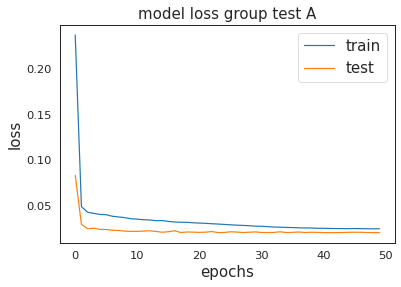

In [141]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.title('model loss group test A',size=15)
plt.ylabel('loss',size=15)
plt.xlabel('epochs',size=15)
plt.legend(loc='upper right',fontsize=15)

plt.show()

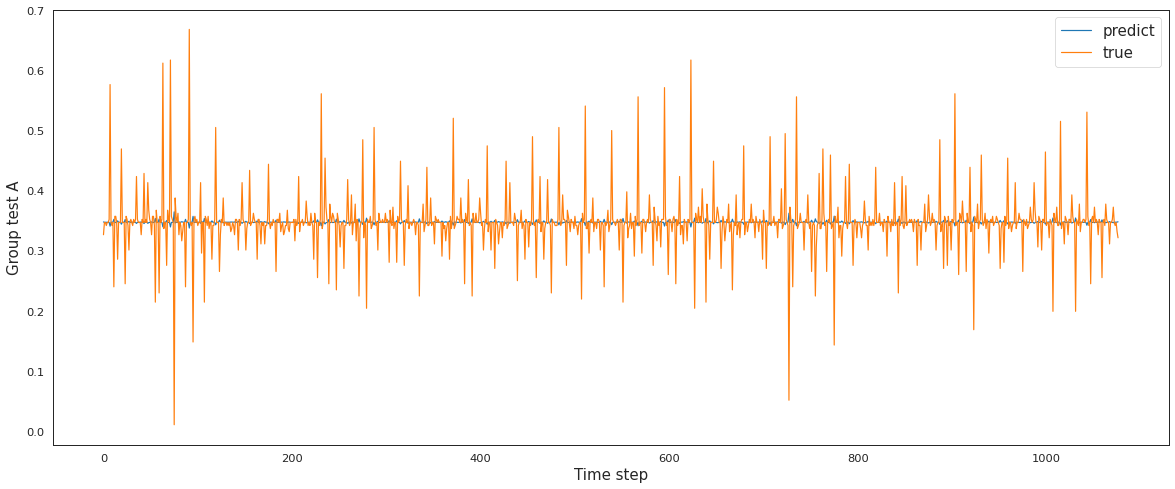

In [142]:
''' Plotting the first 500 entries to see prediction '''
plt.figure(figsize=(20,8))
plt.plot(yhat, label='predict')
plt.plot(a, label='true')
plt.legend()

plt.ylabel('Group test A', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)

plt.show()

In [79]:
# RMSE
from math import sqrt
import math
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objs as go

#for i in cols:
print('MAE value : ', mean_absolute_error(a, yhat))
print('MSE value :', mean_squared_error(a, yhat))
print('RMSE value  : ', sqrt(mean_squared_error(a, yhat)))
print('R-Square value :', r2_score(a, yhat))

r2 = r2_score(a, yhat)
print('The rsquared value is: ' + str(r2))

MAE value :  0.021712200001299763
MSE value : 0.0023308489706917045
RMSE value  :  0.04827886670885828
R-Square value : -0.07437195110251626
The rsquared value is: -0.07437195110251626


### **Step #5.** Forecast

In [91]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [94]:
df = pd.read_csv('/content/drive/MyDrive/THESIS/Dataset/dateset_patient.csv')

In [95]:
train_dates = pd.to_datetime(df['date'])

In [81]:
df_for_training = dataset.astype(float)

In [82]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [118]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to predict into the future
n_past = 14     # Number of past days we want to use to predict the future

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (5374, 14, 1).
trainY shape == (5374, 1).


In [119]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 14, 64)            16896     
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [120]:
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
303/303 [==============================] - 8s 14ms/step - loss: 1.0540 - val_loss: 0.6641
Epoch 2/10
303/303 [==============================] - 4s 12ms/step - loss: 1.0644 - val_loss: 0.6695
Epoch 3/10
303/303 [==============================] - 3s 11ms/step - loss: 1.0185 - val_loss: 0.6670
Epoch 4/10
303/303 [==============================] - 3s 11ms/step - loss: 0.9572 - val_loss: 0.6713
Epoch 5/10
303/303 [==============================] - 3s 11ms/step - loss: 0.9778 - val_loss: 0.6806
Epoch 6/10
303/303 [==============================] - 3s 11ms/step - loss: 0.9760 - val_loss: 0.6801
Epoch 7/10
303/303 [==============================] - 3s 11ms/step - loss: 0.9843 - val_loss: 0.6746
Epoch 8/10
303/303 [==============================] - 3s 11ms/step - loss: 0.9320 - val_loss: 0.7055
Epoch 9/10
303/303 [==============================] - 3s 11ms/step - loss: 0.9488 - val_loss: 0.6699
Epoch 10/10
303/303 [==============================] - 3s 11ms/step - loss: 0.9950 - val_lo

In [121]:
n_future=90  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()

In [122]:
forecast = model.predict(trainX[-n_future:]) #forecast 

In [123]:
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

In [124]:
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [125]:
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'cc':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['date'])

In [126]:
original = df[['date', 'cc']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2020-5-1']

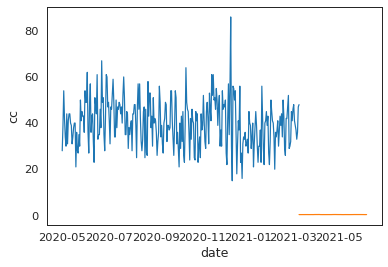

In [128]:
sns.lineplot(original['date'], original['cc'])
sns.lineplot(df_forecast['date'], df_forecast['cc'])